In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval-prediction-dataset/loan_approval.csv


Name:- Viraj Suryakant Gaikwad
Project:- Loan Approval Prediction
Algorithms:- Logistic Regression
Concepts:- Classification,Missing Values Handling
Dataset:- Loan Prediction Dataset
Outcome:- Approve or Rejection

 #### Loan Approval Prediction

 The Process involves collecting data such as applicant income,co-applicant income,credit history,loan amount,loan term,education,employment status,and property area.This data is first
preprocessed by handling missing values,encoding categorical variables,and scaling numerical features if required 

#### 1. Import Libraries

It is the first step in a machine learning project. Libraries provide pre-build functions and tools required for data handling,
visulization,model building,and evaluation,reducing development time
and improving efficiency.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#### 2. Load Dataset

Loading the dataset is a crucial step in a machine learning project where
the required data is imported into the working environment for analysis and model building.

In [3]:
df = pd.read_csv("/kaggle/input/loan-approval-prediction-dataset/loan_approval.csv")

In [4]:
df.head(10)

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes
5,6.0,8265.0,4831.0,Salaried,53.0,Single,1.0,602.0,1.0,0.56,19522.0,2911.0,9798.0,36.0,Home,Semiurban,Graduate,Male,Unemployed,No
6,7.0,18850.0,2768.0,Salaried,58.0,Married,0.0,687.0,0.0,0.48,14635.0,8991.0,26143.0,24.0,Home,Rural,Graduate,Male,Private,No
7,8.0,6426.0,3186.0,Salaried,47.0,Married,2.0,636.0,4.0,NaN,671.0,11572.0,33747.0,84.0,Personal,Rural,Graduate,Female,NaN,No
8,9.0,16423.0,NaN,Salaried,54.0,Married,1.0,729.0,0.0,0.59,777.0,43066.0,34651.0,36.0,Home,Semiurban,Graduate,Male,Private,No
9,10.0,13363.0,2599.0,Contract,35.0,Single,3.0,726.0,1.0,NaN,3022.0,29693.0,22182.0,60.0,Personal,Rural,Graduate,Female,Government,Yes


In [5]:
df = df.drop("Applicant_ID", axis=1)

In [6]:
df.head(10)

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes
5,8265.0,4831.0,Salaried,53.0,Single,1.0,602.0,1.0,0.56,19522.0,2911.0,9798.0,36.0,Home,Semiurban,Graduate,Male,Unemployed,No
6,18850.0,2768.0,Salaried,58.0,Married,0.0,687.0,0.0,0.48,14635.0,8991.0,26143.0,24.0,Home,Rural,Graduate,Male,Private,No
7,6426.0,3186.0,Salaried,47.0,Married,2.0,636.0,4.0,NaN,671.0,11572.0,33747.0,84.0,Personal,Rural,Graduate,Female,NaN,No
8,16423.0,NaN,Salaried,54.0,Married,1.0,729.0,0.0,0.59,777.0,43066.0,34651.0,36.0,Home,Semiurban,Graduate,Male,Private,No
9,13363.0,2599.0,Contract,35.0,Single,3.0,726.0,1.0,NaN,3022.0,29693.0,22182.0,60.0,Personal,Rural,Graduate,Female,Government,Yes


In [7]:
df.isnull().sum()

Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

In [8]:
print(df.describe())

       Applicant_Income  Coapplicant_Income         Age  Dependents  \
count        950.000000          950.000000  950.000000  950.000000   
mean       10852.571579         5082.455789   39.971579    1.474737   
std         5061.632859         2943.161570   11.139797    1.105067   
min         2009.000000            1.000000   21.000000    0.000000   
25%         6730.750000         2472.750000   30.250000    1.000000   
50%        10548.000000         5205.500000   40.000000    1.000000   
75%        15190.000000         7620.750000   49.000000    2.000000   
max        19988.000000         9996.000000   59.000000    3.000000   

       Credit_Score  Existing_Loans   DTI_Ratio       Savings  \
count    950.000000      950.000000  950.000000    950.000000   
mean     676.033684        1.950526    0.347263   9940.452632   
std       71.346015        1.406246    0.144341   5860.736885   
min      550.000000        0.000000    0.100000     65.000000   
25%      616.250000        1.000000

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_Income    950 non-null    float64
 1   Coapplicant_Income  950 non-null    float64
 2   Employment_Status   950 non-null    object 
 3   Age                 950 non-null    float64
 4   Marital_Status      950 non-null    object 
 5   Dependents          950 non-null    float64
 6   Credit_Score        950 non-null    float64
 7   Existing_Loans      950 non-null    float64
 8   DTI_Ratio           950 non-null    float64
 9   Savings             950 non-null    float64
 10  Collateral_Value    950 non-null    float64
 11  Loan_Amount         950 non-null    float64
 12  Loan_Term           950 non-null    float64
 13  Loan_Purpose        950 non-null    object 
 14  Property_Area       950 non-null    object 
 15  Education_Level     950 non-null    object 
 16  Gender 

#### 3. Handling Missing Values

Missing Values occur due to data entry errors,system failure,or incomplete data collection.They must be handled to avoid incorrect analysis and poor model performance.

In [10]:
categorical_col = df.select_dtypes(include=['object']).columns
numerical_col = df.select_dtypes(include=['int64','float64']).columns

In [11]:
categorical_col

Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='object')

In [12]:
numerical_col

Index(['Applicant_Income', 'Coapplicant_Income', 'Age', 'Dependents',
       'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='object')

In [13]:
from sklearn.impute import SimpleImputer
num_imputer=SimpleImputer(strategy='median')
df[numerical_col]=num_imputer.fit_transform(df[numerical_col])

In [14]:
from sklearn.impute import SimpleImputer
cat_imputer=SimpleImputer(strategy='most_frequent')
df[categorical_col]=cat_imputer.fit_transform(df[categorical_col])

In [15]:
df.isnull().sum()

Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

#### 4. Exploratory Data Analysis(EDA)

EDA is the initial step in data analysis used to understand the dataset,
identity patterns,detect anomalies,and check assumptions before applying 
statistical models or machine learning algorithms.

In [16]:
print(df['Loan_Approved'].value_counts())

Loan_Approved
No     702
Yes    298
Name: count, dtype: int64


In [17]:
import plotly.express as px

loan_status_count=df['Loan_Approved'].value_counts().reset_index()
loan_status_count.columns=['Loan_approved','Count']

#plot the pie chart
fig_loan_status=px.pie(loan_status_count, names='Loan_approved', values='Count', title='Loan Status Distribution')

fig_loan_status.show()

In [18]:
gender_count=df['Gender'].value_counts()
fig_gender=px.bar(gender_count, x=gender_count.index, y=gender_count.values, title='Gender distribution')

fig_gender.show()

In [19]:
marital_count=df['Marital_Status'].value_counts()
fig_gender=px.bar(marital_count, x=marital_count.index, y=marital_count.values, title='Marital status distribution')

fig_gender.show()

In [20]:
fig_applicant_income=px.histogram(df,x='Applicant_Income', title='Applicant Income Distribution')

fig_applicant_income.show()

In [21]:
fig_coapplicant_income=px.histogram(df,x='Coapplicant_Income', title='Coapplicant Income Distribution')

fig_coapplicant_income.show()

**Boxplate**

In [22]:
fig_income=px.box(df,x='Loan_Approved', y='Applicant_Income', color='Loan_Approved', title='Loan Approved vs Applicant Income')

fig_income.show()

In [23]:
fig_credit_score=px.histogram(df, x='Credit_Score', color='Loan_Approved', barmode='group', title='Loan Approved vs Credit score')

fig_credit_score.show()

#### 5. Encoding Variables

Encoding Variables in Python,is the process of converting non-numeric data into a numerical format that machine learning algorithms can process.This is crucial data preprocessing step.

In [24]:
df.head(10)

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes
5,8265.0,4831.0,Salaried,53.0,Single,1.0,602.0,1.0,0.56,19522.0,2911.0,9798.0,36.0,Home,Semiurban,Graduate,Male,Unemployed,No
6,18850.0,2768.0,Salaried,58.0,Married,0.0,687.0,0.0,0.48,14635.0,8991.0,26143.0,24.0,Home,Rural,Graduate,Male,Private,No
7,6426.0,3186.0,Salaried,47.0,Married,2.0,636.0,4.0,0.34,671.0,11572.0,33747.0,84.0,Personal,Rural,Graduate,Female,Private,No
8,16423.0,5205.5,Salaried,54.0,Married,1.0,729.0,0.0,0.59,777.0,43066.0,34651.0,36.0,Home,Semiurban,Graduate,Male,Private,No
9,13363.0,2599.0,Contract,35.0,Single,3.0,726.0,1.0,0.34,3022.0,29693.0,22182.0,60.0,Personal,Rural,Graduate,Female,Government,Yes


In [25]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label_encode=LabelEncoder()
for col in ["Marital_Status","Gender","Loan_Approved"]:
    if col in df.columns:
        df[col]=label_encode.fit_transform(df[col])

In [26]:
df=pd.get_dummies(df,columns=[
    "Employment_Status",
    "Property_Area",
    "Education_Level",
    "Loan_Purpose",
    "Employer_Category"             
],drop_first=True)

In [27]:
df.head(10)

,Applicant_Income,Coapplicant_Income,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,...,Property_Area_Urban,Education_Level_Not Graduate,Loan_Purpose_Car,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,17795.0,1387.0,51.0,0,0.0,637.0,4.0,0.53,19403.0,45638.0,...,True,True,False,False,False,True,False,False,True,False
1,2860.0,2679.0,46.0,0,3.0,621.0,2.0,0.30,2580.0,49272.0,...,False,False,True,False,False,False,False,False,True,False
2,7390.0,2106.0,25.0,1,2.0,674.0,4.0,0.20,13844.0,6908.0,...,True,False,False,False,False,False,True,False,False,False
3,13964.0,8173.0,40.0,0,2.0,579.0,3.0,0.31,9553.0,10844.0,...,False,False,False,False,False,False,True,False,False,False
4,13284.0,4223.0,31.0,1,2.0,721.0,1.0,0.29,9386.0,37629.0,...,True,False,True,False,False,False,False,False,True,False
5,8265.0,4831.0,53.0,1,1.0,602.0,1.0,0.56,19522.0,2911.0,...,False,False,False,False,True,False,False,False,False,True
6,18850.0,2768.0,58.0,0,0.0,687.0,0.0,0.48,14635.0,8991.0,...,False,False,False,False,True,False,False,False,True,False
7,6426.0,3186.0,47.0,0,2.0,636.0,4.0,0.34,671.0,11572.0,...,False,False,False,False,False,True,False,False,True,False
8,16423.0,5205.5,54.0,0,1.0,729.0,0.0,0.59,777.0,43066.0,...,False,False,False,False,True,False,False,False,True,False
9,13363.0,2599.0,35.0,1,3.0,726.0,1.0,0.34,3022.0,29693.0,...,False,False,False,False,False,True,True,False,False,False


#### 6. Correlation Heatmap

A correlation heatmap in python is a powerful data visulization tool used to graphically display the correlation matrix of a dataset, revealing relationships between muliple numeric variables at a glance.It uses a color-coded matrix to show both the strength and direction of correlations.

Loan_Approved         1.000000
Credit_Score          0.451235
Applicant_Income      0.120177
Marital_Status        0.030182
Collateral_Value      0.021709
Coapplicant_Income    0.003957
Savings              -0.013462
Dependents           -0.018999
Age                  -0.022354
Existing_Loans       -0.035101
Gender               -0.054342
Loan_Term            -0.086644
Loan_Amount          -0.126608
DTI_Ratio            -0.444766
Name: Loan_Approved, dtype: float64


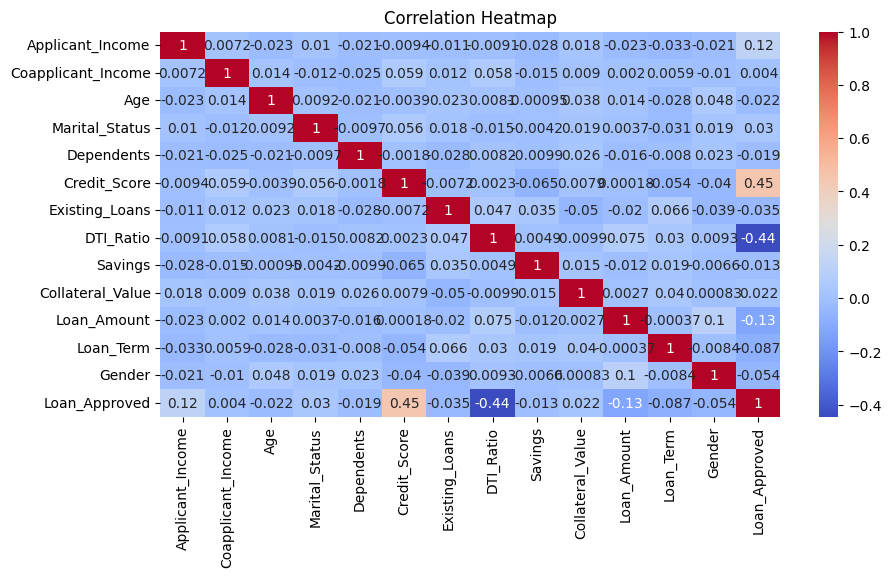

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df=df.select_dtypes(include=['float64','int64'])
corr=numeric_df.corr()["Loan_Approved"].sort_values(ascending=False)
print(corr)

plt.figure(figsize=(10,5))
sns.heatmap(numeric_df.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#### 7. Training Loan Approval Prediction Model



In [29]:
x=df.drop('Loan_Approved', axis=1)
y=df['Loan_Approved']

In [30]:
x

,Applicant_Income,Coapplicant_Income,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,...,Property_Area_Urban,Education_Level_Not Graduate,Loan_Purpose_Car,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,17795.0,1387.0,51.0,0,0.0,637.0,4.0,0.53,19403.0,45638.0,...,True,True,False,False,False,True,False,False,True,False
1,2860.0,2679.0,46.0,0,3.0,621.0,2.0,0.30,2580.0,49272.0,...,False,False,True,False,False,False,False,False,True,False
2,7390.0,2106.0,25.0,1,2.0,674.0,4.0,0.20,13844.0,6908.0,...,True,False,False,False,False,False,True,False,False,False
3,13964.0,8173.0,40.0,0,2.0,579.0,3.0,0.31,9553.0,10844.0,...,False,False,False,False,False,False,True,False,False,False
4,13284.0,4223.0,31.0,1,2.0,721.0,1.0,0.29,9386.0,37629.0,...,True,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10548.0,9092.0,58.0,0,0.0,557.0,0.0,0.59,5370.0,43563.0,...,True,True,False,False,False,True,False,False,False,True
996,3279.0,6356.0,58.0,0,1.0,646.0,3.0,0.19,9880.5,18361.0,...,True,False,False,False,False,False,True,False,False,False
997,15192.0,8433.0,48.0,1,1.0,666.0,1.0,0.40,8581.0,41335.0,...,False,False,False,False,True,False,False,True,False,False
998,9083.0,7380.0,50.0,1,1.0,748.0,3.0,0.31,13491.0,8933.0,...,True,False,False,False,False,True,False,False,True,False


In [31]:
y

0      0
1      0
2      1
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: Loan_Approved, Length: 1000, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)

#### 8. Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [34]:
x_train_scaled

array([[-1.41039098,  1.12015367, -1.27264814, ..., -0.41733475,
        -0.86266219, -0.31448545],
       [ 1.73380125,  0.65453244,  0.01054048, ..., -0.41733475,
        -0.86266219, -0.31448545],
       [-0.64540315,  0.64674258,  1.56869809, ..., -0.41733475,
        -0.86266219, -0.31448545],
       ...,
       [-0.23021574,  0.36489125, -0.81436649, ..., -0.41733475,
         1.15920231, -0.31448545],
       [ 1.11944422, -0.46260443,  1.20207277, ..., -0.41733475,
        -0.86266219, -0.31448545],
       [-1.74996214,  0.02390779,  0.01054048, ...,  2.39615797,
        -0.86266219, -0.31448545]])

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#### 9. Training Models

In [36]:
log_model=LogisticRegression(max_iter=1000,random_state=42)
log_model.fit(x_train_scaled,y_train)
log_pred=log_model.predict(x_test_scaled)

In [37]:
svm_model=SVC(kernel='rbf',probability=True,random_state=42)
svm_model.fit(x_train_scaled,y_train)
svm_pred=svm_model.predict(x_test_scaled)

In [38]:
rf_model=RandomForestClassifier(n_estimators=200,random_state=42)
rf_model.fit(x_train_scaled,y_train)
rf_pred=rf_model.predict(x_test_scaled)

#### 10. Evaluates Models

In [39]:
models={
    'Logistic Regression':(y_test,log_pred),
    'Support Vector Machine':(y_test,svm_pred),
    'Random Forest':(y_test,rf_pred)
}

accuracy_scores={}

In [40]:
for model_name,(y_true,y_pred) in models.items():
    acc=accuracy_score(y_true,y_pred)
    accuracy_scores[model_name]=acc
    print(f"{model_name} Accuracy: {acc}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true,y_pred))
    print("Classification Report:")
    print(classification_report(y_true,y_pred))
    print("\n")

Logistic Regression Accuracy: 0.84
Confusion Matrix:
[[249  20]
 [ 44  87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       269
           1       0.81      0.66      0.73       131

    accuracy                           0.84       400
   macro avg       0.83      0.79      0.81       400
weighted avg       0.84      0.84      0.84       400



Support Vector Machine Accuracy: 0.83
Confusion Matrix:
[[256  13]
 [ 55  76]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       269
           1       0.85      0.58      0.69       131

    accuracy                           0.83       400
   macro avg       0.84      0.77      0.79       400
weighted avg       0.83      0.83      0.82       400



Random Forest Accuracy: 0.8975
Confusion Matrix:
[[254  15]
 [ 26 105]]
Classification Report:
              precision    recall  f1-score   

#### 11. Best Model Selection

In [41]:
best_model=max(accuracy_scores,key=accuracy_scores.get)
print(f"Best Model: {best_model}")

Best Model: Random Forest


#### 12. Important Features

In [42]:
importances=rf_model.feature_importances_

In [43]:
importances

array([0.0814085 , 0.04372533, 0.03771125, 0.00691416, 0.01575598,
       0.26492653, 0.01513426, 0.26822134, 0.0418044 , 0.04095854,
       0.06326394, 0.03527757, 0.00762017, 0.00725662, 0.00557714,
       0.00234268, 0.00531102, 0.00684575, 0.00692037, 0.00568165,
       0.0046813 , 0.00619083, 0.00499109, 0.00525388, 0.00591929,
       0.00627829, 0.00402815])

In [44]:
importance_df=pd.DataFrame({
    "Feature":x.columns,
    "Importance":importances
}).sort_values(by="Importance",ascending=False)

In [45]:
importance_df.head(10)

,Feature,Importance
7,DTI_Ratio,0.268221
5,Credit_Score,0.264927
0,Applicant_Income,0.081408
10,Loan_Amount,0.063264
1,Coapplicant_Income,0.043725
8,Savings,0.041804
9,Collateral_Value,0.040959
2,Age,0.037711
11,Loan_Term,0.035278
4,Dependents,0.015756
